<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/colorGrading/tests/DeepPreset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Preset : Blending and Retouching Photos with Color Style Transfer

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2007.10701)
[![GitHub Stars](https://img.shields.io/github/stars/minhmanho/deep_preset?style=social)](https://github.com/minhmanho/deep_preset)


# 1. Preparations
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

In [ ]:
!nvidia-smi

Tue Apr 19 11:02:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

1. linking next cloud

In [1]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

input_folder, output_folder = create_io(database=nextcloud,topic='colorGrading',library='DeepPreset')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2480  100  2480    0     0   6138      0 --:--:-- --:--:-- --:--:--  6123
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  


2. Clone Git repository

In [2]:
import os
root_path = '/content/DeepPreset'

# folder with style transfer
style_folder = '/content/database/colorGrading/style'

# clone the repository
if not os.path.exists('DeepPreset'):
  !git clone https://github.com/minhmanho/deep_preset {root_path}

%ls

Cloning into '/content/DeepPreset'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 93 (delta 9), reused 14 (delta 6), pack-reused 76
Unpacking objects: 100% (93/93), done.
database/  database_mod.py  DeepPreset/  __pycache__/  sample_data/


3. Set up the environment

In [3]:
# Set up the environment
!pip -q install numpy
!pip -q install Pillow
!pip3 -q install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

     |██████████████▋                 | 834.1 MB 1.5 MB/s eta 0:10:44tcmalloc: large alloc 1147494400 bytes == 0x3904a000 @  0x7f4335591615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |██████████████████▌             | 1055.7 MB 1.5 MB/s eta 0:08:36tcmalloc: large alloc 1434370048 bytes == 0x7d6a0000 @  0x7f4335591615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |███████████████████████▌        | 1336.2 MB 1.5 MB/s eta 0:05:29tcmalloc: large alloc 1792966656 bytes == 0x24d2000 @  0x7f4335591615 0x592b76 0x4df71e 0x59afff 0x515655 0x5

Only needed when we have to "**restart the Runtime**", otherwise 
the variables aren't defined.

In [4]:
# populate vars when runtime restart is needed
input_folder = '/content/database/colorGrading/input/deep'
output_folder = '/content/database/colorGrading/DeepPreset'
style_folder = '/content/database/colorGrading/style/pureColor'
root_path = '/content/DeepPreset'

print ('input/t:::/t' , input_folder)
print ('output/t:::/t' , output_folder)
print ('style/t:::/t' , style_folder)
print ('root/t:::/t' , root_path)

# we need to find a good way for testing some other folders and colorgrading images

input/t:::/t /content/database/colorGrading/input/deep
output/t:::/t /content/database/colorGrading/DeepPreset
style/t:::/t /content/database/colorGrading/style/pureColor
root/t:::/t /content/DeepPreset


4. Download the pre-trained model

In [8]:
%cd {root_path}
%ls
# Download the pre-trained model
# one of the two models is gonna work better (cfr paper)
# Deep Preset with PPL (Positive Pair-wise Loss)
!sh models/fetch_model_wPPL.sh

# Deep Preset without PPL for preset prediction
#!sh models/fetch_model_woPPL.sh

/content/DeepPreset
data/  dp.py    networks/     README.md  utils.py
docs/  models/  __pycache__/  run.py
Downloading...
From: https://drive.google.com/uc?id=1GegyHf3OD17k_WID3-vA7S8nRQwPfpTC
To: /content/DeepPreset/models/dp_wPPL.pth.tar
100% 1.07G/1.07G [00:09<00:00, 117MB/s]


# 2. Inference


In [9]:
!python run.py --content {input_folder} --style {style_folder} --out {output_folder} --ckpt models/dp_wPPL.pth.tar --size 400x592

/content/database/colorGrading/input/deep
/content/database/colorGrading/DeepPreset
/content/database/colorGrading/style/pureColor
/content/DeepPreset
1/8: 01.jpg
2/8: 02.jpg
3/8: 03.jpg
4/8: 04.jpg
5/8: 05.jpg
6/8: 06.jpg
7/8: 07.jpg
8/8: 08.jpg
Done !


# 3. Visualization

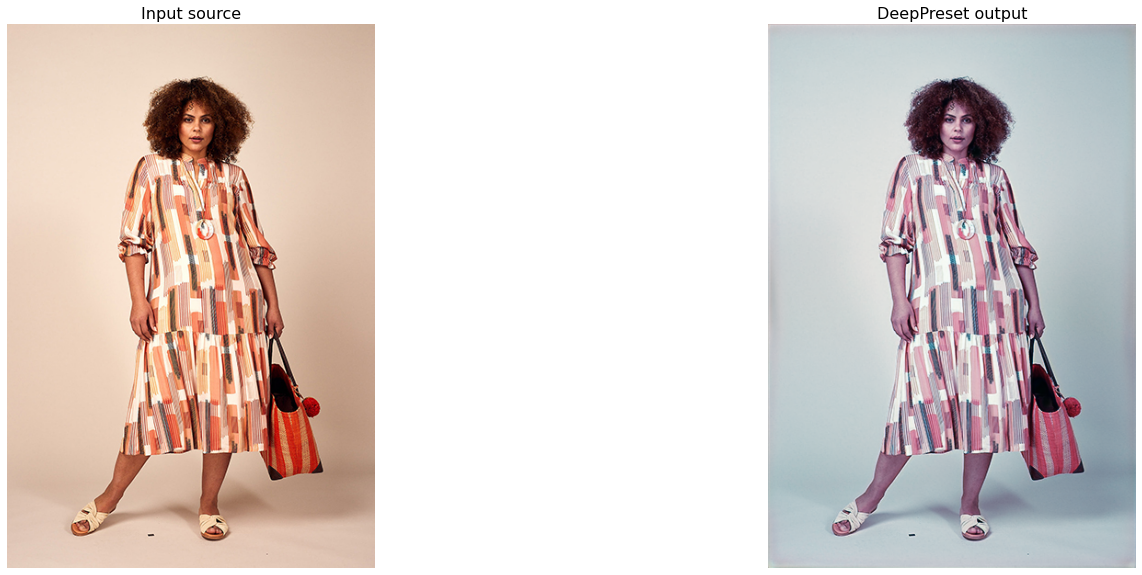

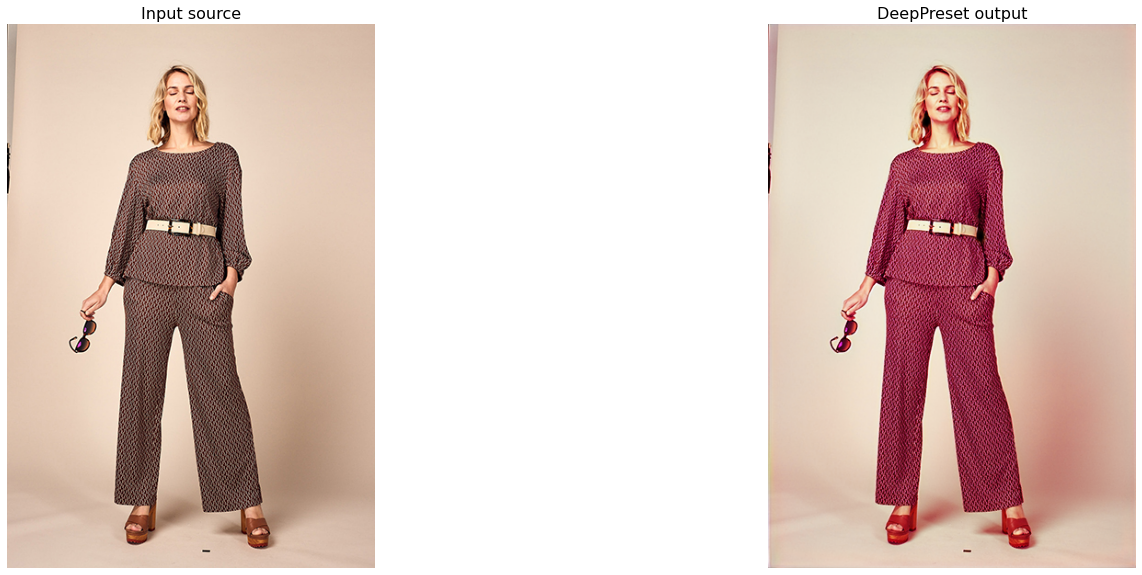

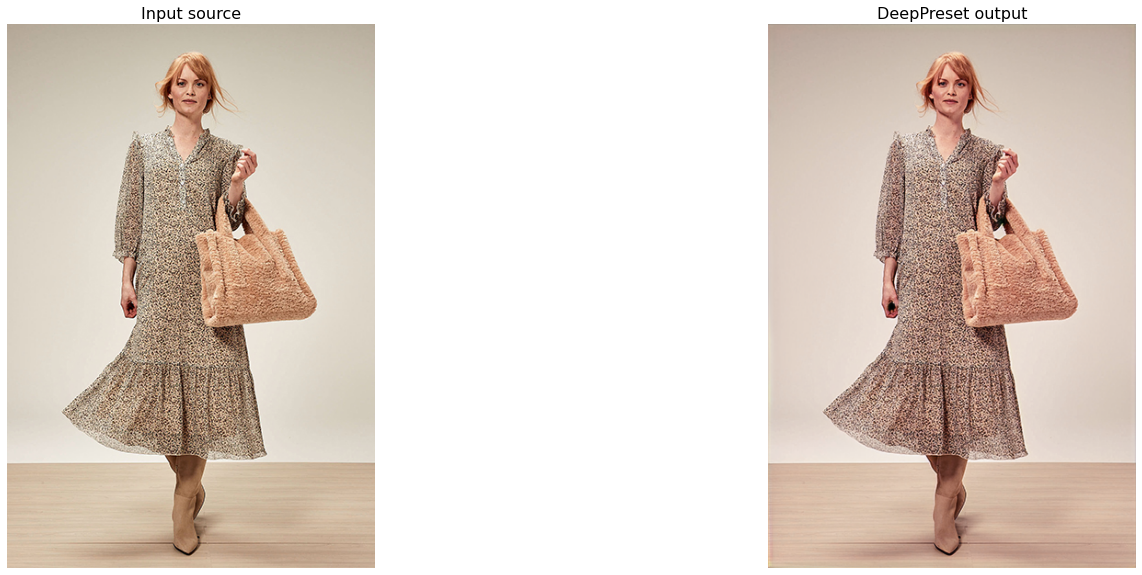

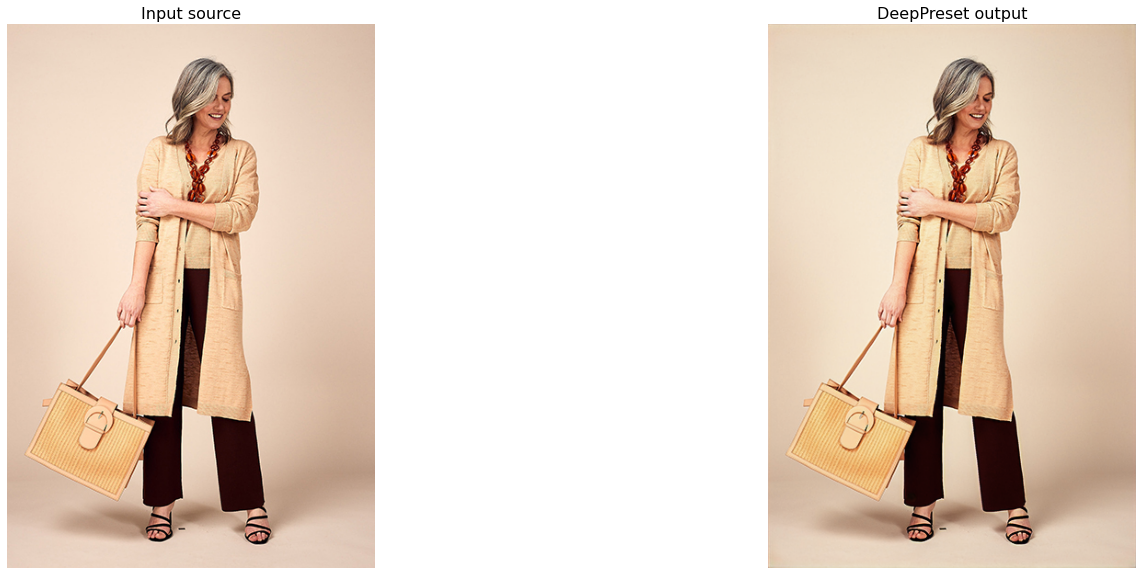

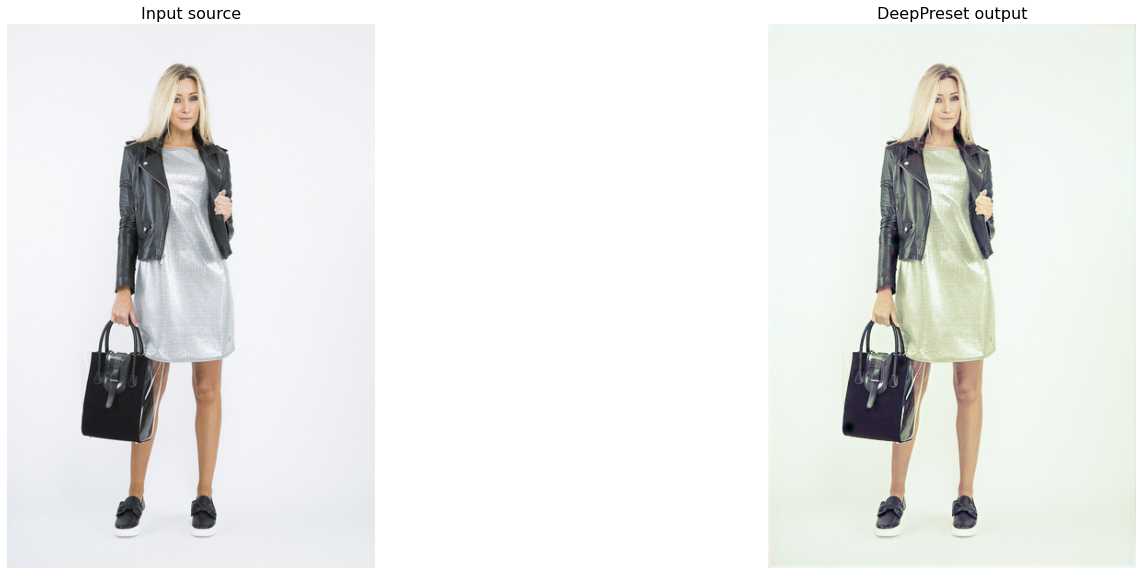

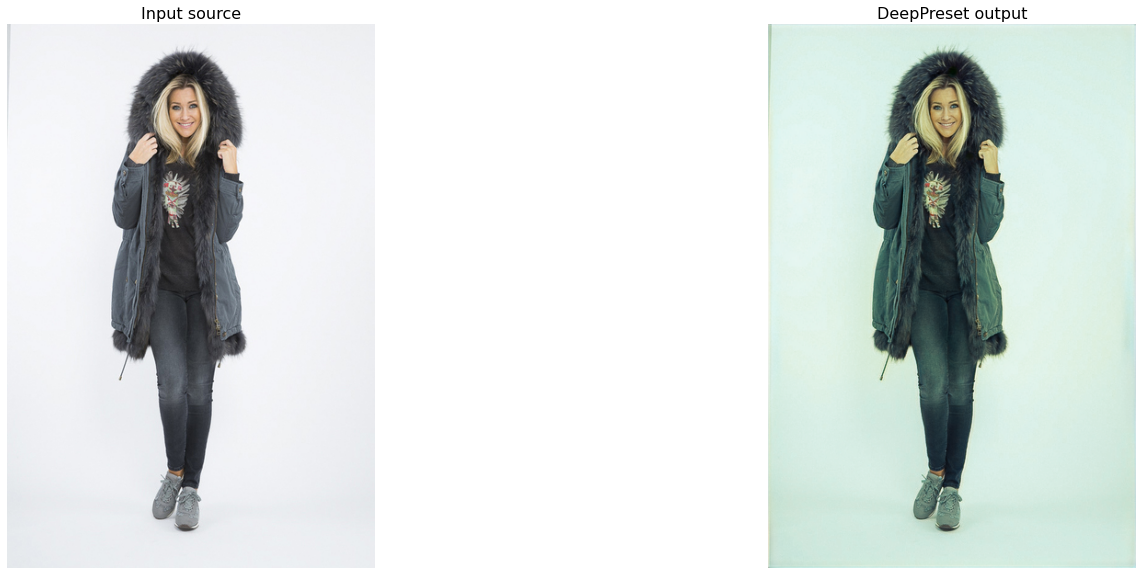

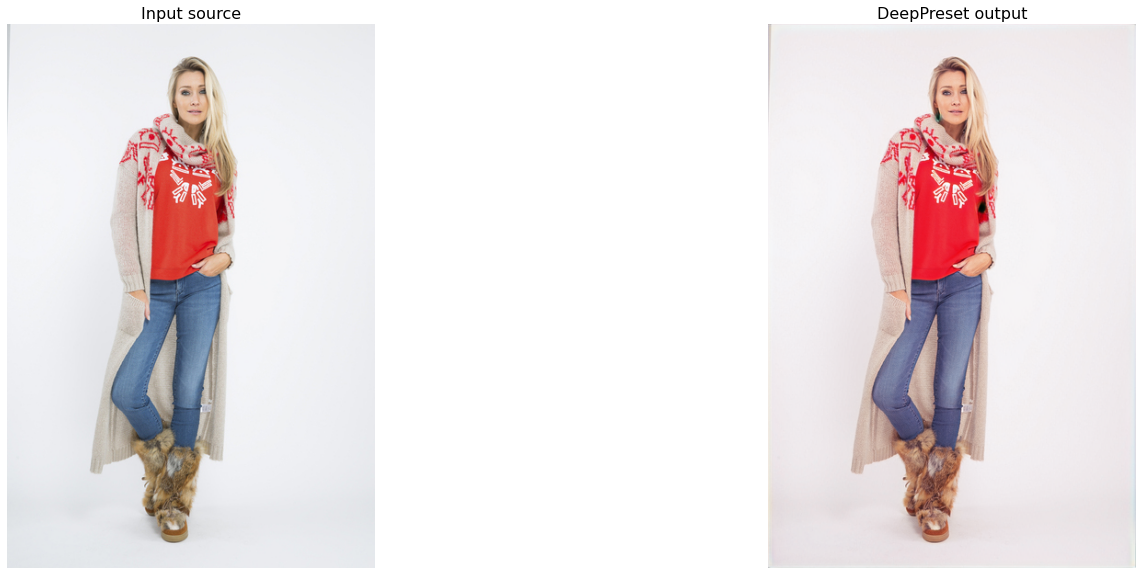

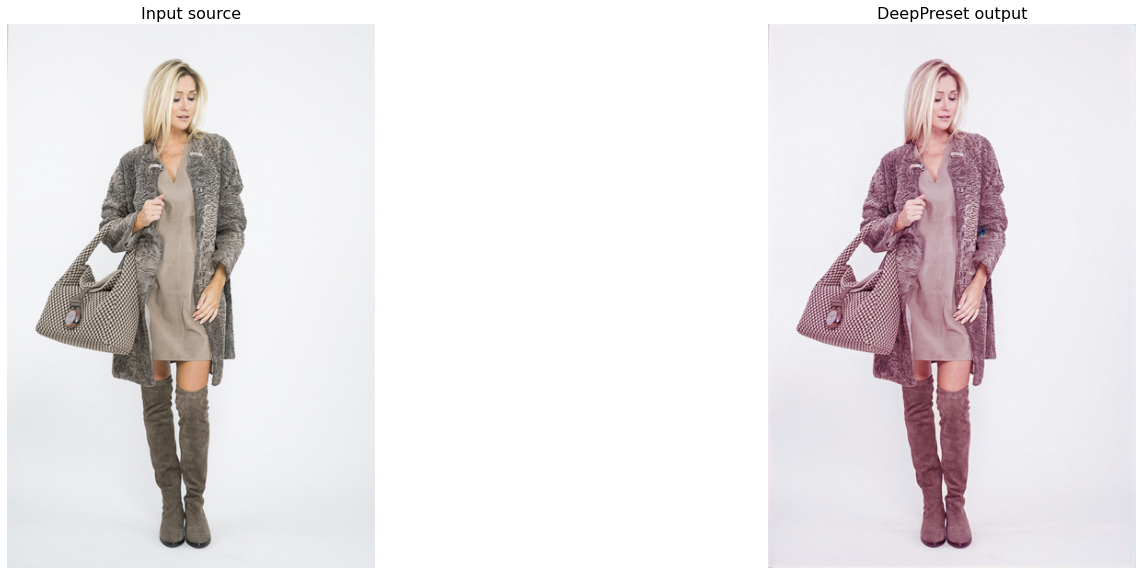

In [10]:
# utils for visualization
import os
import glob
import cv2
import matplotlib.pyplot as plt

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  ax1.axis('off')
  plt.title('Input source', fontsize=16)
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.axis('off')
  plt.title('DeepPreset output', fontsize=16)
  ax1.imshow(img1)
  ax2.imshow(img2)

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# making a list of both I/O folders
input_list = sorted(glob.glob(os.path.join(input_folder, '*.jpg')))
output_list = sorted(glob.glob(os.path.join(output_folder, '*.png')))

# display each image in the upload folder
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 4. Download Results


In [11]:
# Download the results
zip_filename = 'DeepPreset.zip'

download_zip(zip_filename, output_folder)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>